In [47]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns

# 모든 데이터를 볼 수 있는 ( head랑 tail만 보여주는게 아니라, 다 보여주는 방법)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
# 데이터 받아 오기
data_name = f"在淘宝上公司数据.csv"
data_name = pd.read_csv(data_name) #Encoding cp949는 못함, 

In [49]:
## 중국어 폰트 설정 하는 방법

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:\Windows\Fonts/simhei.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 폰트를 선명하게 하기
# retina설정
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats("retina")


In [50]:
df = data_name

In [51]:
df.columns

Index(['日期', '品牌', '产品', '价格', '累计收藏', '累计评论', '付款(累计）-每个月更新', '产品.1', '累计价格',
       '累计收藏.1', '累计评论.1', '付款(累计）', '淘宝（浏览量）', '淘宝（访客量）', '特点活动',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [52]:
df.tail()

,日期,品牌,产品,价格,累计收藏,累计评论,付款(累计）-每个月更新,产品.1,累计价格,累计收藏.1,累计评论.1,付款(累计）,淘宝（浏览量）,淘宝（访客量）,特点活动,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
65,2022-04-27,NaN,眼霜,398,NaN,NaN,NaN,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2022-04-28,NaN,眼霜,398,NaN,NaN,NaN,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2022-04-29,NaN,眼霜,398,NaN,NaN,NaN,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2022-04-30,NaN,眼霜,398,NaN,NaN,NaN,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2022-05-01,NaN,眼霜,398,NaN,NaN,NaN,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 전처리 数据处理

In [53]:
#행 삭제
df = df.drop(df.columns[15:], axis=1)
df

,日期,品牌,产品,价格,累计收藏,累计评论,付款(累计）-每个月更新,产品.1,累计价格,累计收藏.1,累计评论.1,付款(累计）,淘宝（浏览量）,淘宝（访客量）,特点活动
0,2022-02-21,Eternaleaf,眼霜,398,6.0,3.0,17.000000,眼膜,99,26.0,21.0,5.0,184.0,23.0,2022/2/14/~2022/2/16：情人节
1,2022-02-22,NaN,眼霜,398,7.0,3.0,18.000000,眼膜,99,27.0,21.0,5.0,114.0,30.0,2022/2/14/~2022/2/16：情人节
2,2022-02-23,NaN,眼霜,398,7.0,6.0,19.000000,眼膜,99,28.0,21.0,5.0,155.0,18.0,NaN
3,2022-02-24,NaN,眼霜,398,7.0,7.0,19.000000,眼膜,99,29.0,21.0,5.0,119.0,19.0,NaN
4,2022-02-25,NaN,眼霜,398,7.0,7.0,19.000000,眼膜,99,29.0,21.0,5.0,102.0,31.0,NaN
5,2022-02-26,NaN,眼霜,398,7.0,7.0,19.000000,眼膜,99,29.0,21.0,5.0,127.0,28.0,NaN
6,2022-02-27,NaN,眼霜,398,7.0,7.0,18.000000,眼膜,99,30.0,9.0,6.0,79.0,22.0,NaN
7,2022-02-28,NaN,眼霜,398,7.0,7.0,18.000000,眼膜,99,32.0,9.0,6.0,123.0,28.0,NaN
8,2022-03-01,NaN,眼霜,398,7.0,7.0,18.000000,眼膜,99,32.0,9.0,6.0,143.0,33.0,NaN
9,2022-03-02,NaN,眼霜,398,7.0,7.0,18.000000,眼膜,99,32.0,9.0,6.0,158.0,32.0,NaN


In [54]:
#이건 index이름 바꾸어주는거
df = df.rename({'付款(累计）-每个月更新':'付款'}, inplace=False)
#df.rename({'?品':'产品'}, axis=1, inplace = True)
#df.rename({'累???':'累计评论'}, axis=1, inplace = True)
#df.rename({'特点活?':'特点活动'}, axis=1, inplace = True)

#df.rename({'日期.1':'日期.1'}, axis=1, inplace = True)
#df.rename({'?品.1':'产品.1'}, axis=1, inplace = True)
#df.rename({'价格.1':'价格(元).1'}, axis=1, inplace = True)
#df.rename({'收藏.1':'收藏.1'}, axis=1, inplace = True)
#df.rename({'累???.1':'累计评论.1'}, axis=1, inplace = True)
#df.rename({'特点活?.1':'特点活动.1'}, axis=1, inplace = True)
#df.rename({'付款.1':'付款数.1'}, axis=1, inplace = True)

#df = df.drop(['Unnamed: 15'], axis = 1)
#df = df.drop(['Unnamed: 16'], axis = 1)
#df = df.drop(['特点活动'], axis = 1)
#df = df.drop(['??'], axis = 1)

# 특정 컬럼의 '메뉴'에서 '돈까스'가 포함된 행 삭제 (특정값만) , 
#방법 1 : idx = DF[DF['메뉴'] == "돈까스"].index
#         DF.drop(idx , inplace=True)
#방법 2 : DF = DF[DF.메뉴 != '돈까스']

# 컬럼 삭제하기(세로 삭제)
#df = df.drop(['情人?'], axis = 1)

# 컬럼 추가
# df.loc['7번'] = None

#컬럼 이름 바꾸기
#df.rename({'付款':'付款数'}, axis=1, inplace = True)
#df.rename({'价格':'价格(元)'}, axis=1, inplace = True)

# 행 추가
# df.loc['7번'] = None

In [55]:
df = df.rename({'付款(累计）-每个月更新':'付款'}, axis=1)

#행 삭제
df = df.drop(df.index[49:])


In [56]:
#열 삭제 
#df = df.drop(['Unnamed: 15'], axis = 1)

df = df.drop(['品牌'], axis = 1)
df = df.drop(['特点活动'], axis = 1)

In [57]:
#결측치 확인하기
df.isnull()
#결측치 0으로 다 바꾸어 주기
df = df.fillna(0)

In [58]:
df.corr() #상관계수 보는것 1에 가까울 수록 상관이 있다는..

,价格,累计收藏,累计评论,付款,累计价格,累计收藏.1,累计评论.1,付款(累计）,淘宝（浏览量）,淘宝（访客量）
价格,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
累计收藏,NaN,1.000000,0.905556,0.961640,NaN,0.989328,-0.047687,0.974231,-0.146927,0.054219
累计评论,NaN,0.905556,1.000000,0.807287,NaN,0.924989,-0.282880,0.876015,-0.100320,0.036569
付款,NaN,0.961640,0.807287,1.000000,NaN,0.956740,0.008958,0.983599,-0.103295,0.151771
累计价格,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
累计收藏.1,NaN,0.989328,0.924989,0.956740,NaN,1.000000,-0.130610,0.981797,-0.103316,0.134052
累计评论.1,NaN,-0.047687,-0.282880,0.008958,NaN,-0.130610,1.000000,-0.109795,-0.131091,-0.215854
付款(累计）,NaN,0.974231,0.876015,0.983599,NaN,0.981797,-0.109795,1.000000,-0.066501,0.185963
淘宝（浏览量）,NaN,-0.146927,-0.100320,-0.103295,NaN,-0.103316,-0.131091,-0.066501,1.000000,0.632068
淘宝（访客量）,NaN,0.054219,0.036569,0.151771,NaN,0.134052,-0.215854,0.185963,0.632068,1.000000


In [59]:
df

,日期,产品,价格,累计收藏,累计评论,付款,产品.1,累计价格,累计收藏.1,累计评论.1,付款(累计）,淘宝（浏览量）,淘宝（访客量）
0,2022-02-21,眼霜,398,6.0,3.0,17.0,眼膜,99,26.0,21.0,5.0,184.0,23.0
1,2022-02-22,眼霜,398,7.0,3.0,18.0,眼膜,99,27.0,21.0,5.0,114.0,30.0
2,2022-02-23,眼霜,398,7.0,6.0,19.0,眼膜,99,28.0,21.0,5.0,155.0,18.0
3,2022-02-24,眼霜,398,7.0,7.0,19.0,眼膜,99,29.0,21.0,5.0,119.0,19.0
4,2022-02-25,眼霜,398,7.0,7.0,19.0,眼膜,99,29.0,21.0,5.0,102.0,31.0
5,2022-02-26,眼霜,398,7.0,7.0,19.0,眼膜,99,29.0,21.0,5.0,127.0,28.0
6,2022-02-27,眼霜,398,7.0,7.0,18.0,眼膜,99,30.0,9.0,6.0,79.0,22.0
7,2022-02-28,眼霜,398,7.0,7.0,18.0,眼膜,99,32.0,9.0,6.0,123.0,28.0
8,2022-03-01,眼霜,398,7.0,7.0,18.0,眼膜,99,32.0,9.0,6.0,143.0,33.0
9,2022-03-02,眼霜,398,7.0,7.0,18.0,眼膜,99,32.0,9.0,6.0,158.0,32.0


## 데이터 시각화 数据可视化和分析相关关系

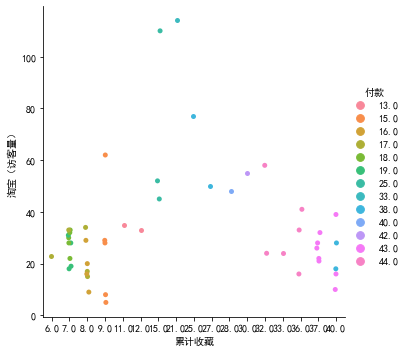

In [81]:
# 3개의 컬럼을 비교가능
# catplot
sns.catplot(x='累计收藏', y='淘宝（访客量）',hue='付款', data =df)

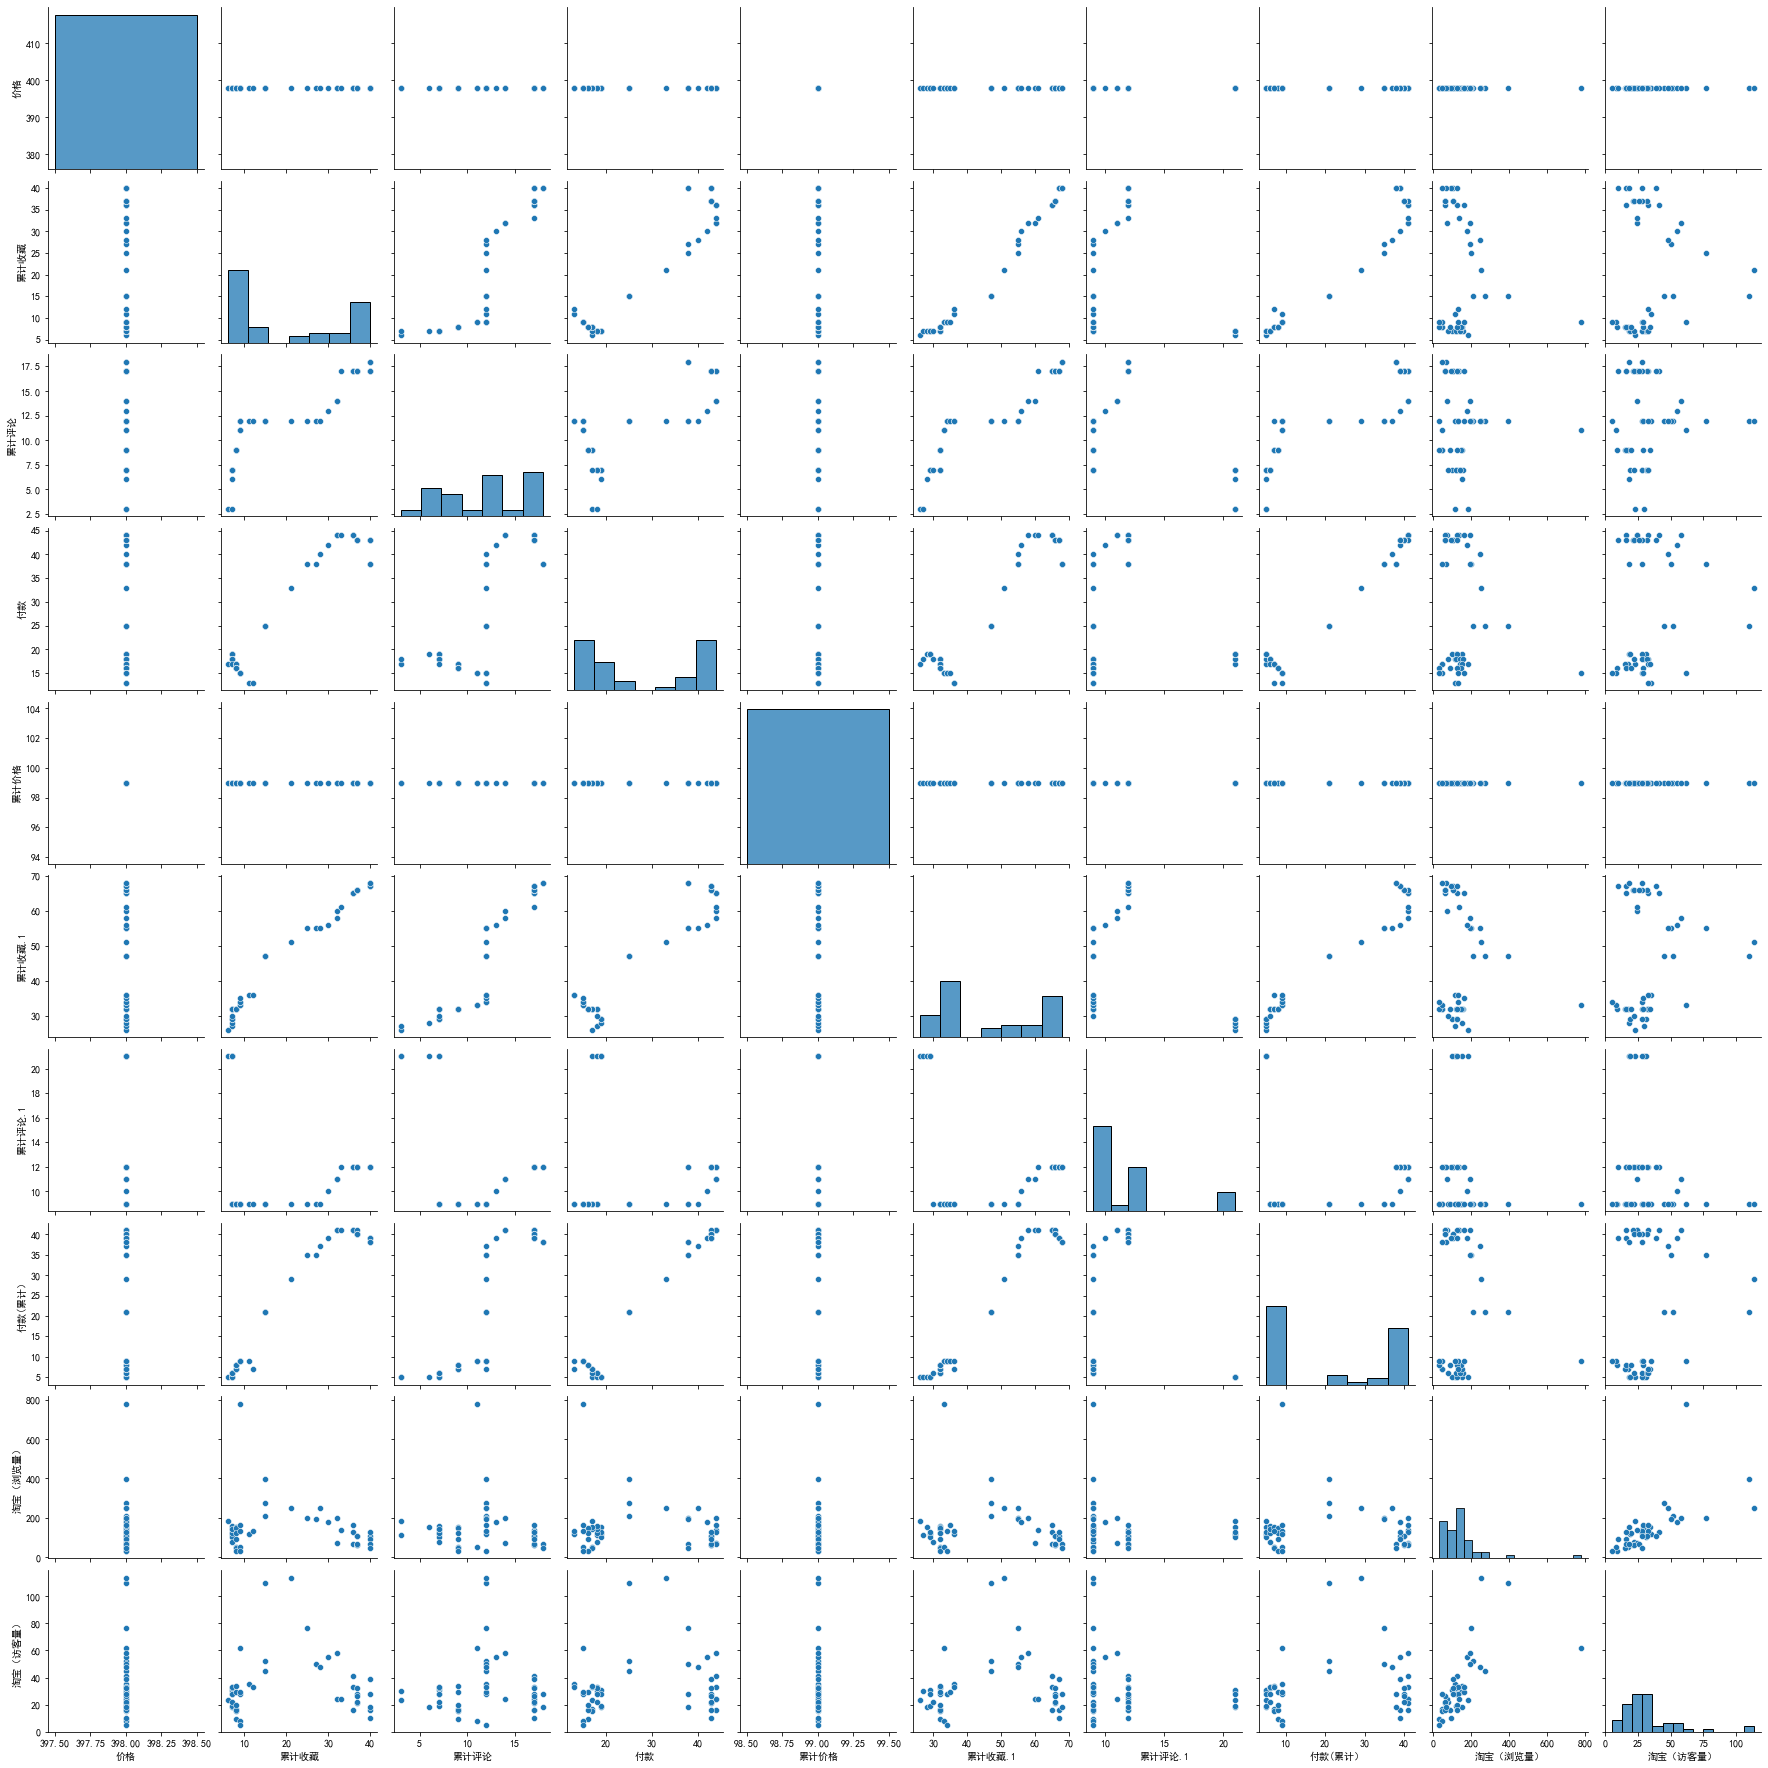

In [46]:
# 确认数据相关的关系
grid_ndf = sns.pairplot(df) 
#　累计评论和收藏越高的话　付钱数也一起增加。

In [15]:
df.sort_values(by='累计评论',ascending=False) #总计순으로 sort_values()정렬하여 어느날에 가장많은 값을 가진지 확인.

,日期,产品,价格,累计收藏,累计评论,付款,产品.1,累计价格,累计收藏.1,累计评论.1,付款(累计）,淘宝（浏览量）,淘宝（访客量）
48,2022-04-10,眼霜,398,40.0,18.0,38.0,眼膜,99,68.0,12.0,38.0,49.0,28.0
47,2022-04-09,眼霜,398,40.0,18.0,38.0,眼膜,99,68.0,12.0,38.0,68.0,18.0
41,2022-04-03,眼霜,398,37.0,17.0,43.0,眼膜,99,66.0,12.0,40.0,64.0,22.0
35,2022-03-28,眼霜,398,33.0,17.0,44.0,眼膜,99,61.0,12.0,41.0,138.0,24.0
36,2022-03-29,眼霜,398,36.0,17.0,44.0,眼膜,99,65.0,12.0,41.0,128.0,41.0
38,2022-03-31,眼霜,398,36.0,17.0,44.0,眼膜,99,65.0,12.0,41.0,66.0,16.0
39,2022-04-01,眼霜,398,37.0,17.0,43.0,眼膜,99,66.0,12.0,41.0,62.0,21.0
40,2022-04-02,眼霜,398,37.0,17.0,43.0,眼膜,99,66.0,12.0,40.0,106.0,32.0
37,2022-03-30,眼霜,398,36.0,17.0,44.0,眼膜,99,65.0,12.0,41.0,165.0,33.0
42,2022-04-04,眼霜,398,37.0,17.0,43.0,眼膜,99,66.0,12.0,40.0,107.0,28.0


Text(0, 0.5, '累计评论')

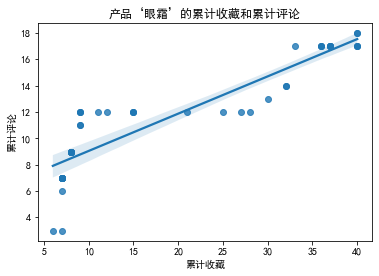

In [22]:
ax=plt.subplot()
ax=sns.regplot(x='累计收藏', y='累计评论', data = df)
ax.set_title('产品‘眼霜’的累计收藏和累计评论')
ax.set_xlabel('累计收藏')
ax.set_ylabel('累计评论')

Text(0, 0.5, '累计评论')

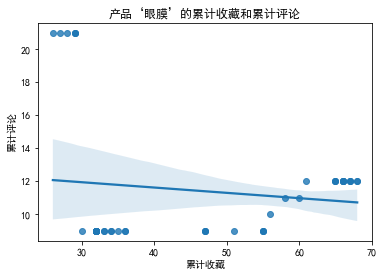

In [23]:
ax=plt.subplot()
ax=sns.regplot(x='累计收藏.1', y='累计评论.1', data = df)
ax.set_title('产品‘眼膜’的累计收藏和累计评论')
ax.set_xlabel('累计收藏')
ax.set_ylabel('累计评论')

In [62]:
df.head(2)

,日期,产品,价格,累计收藏,累计评论,付款,产品.1,累计价格,累计收藏.1,累计评论.1,付款(累计）,淘宝（浏览量）,淘宝（访客量）
0,2022-02-21,眼霜,398,6.0,3.0,17.0,眼膜,99,26.0,21.0,5.0,184.0,23.0
1,2022-02-22,眼霜,398,7.0,3.0,18.0,眼膜,99,27.0,21.0,5.0,114.0,30.0


# 단순회귀로 상관관계 분석해보기
### 利用机器学习单纯回归分析的数据相关关系分析

train data 개수 :  34
testdata 개수 :  15
0.9461885169907109
기울기 :  [[0.88334097]]


y절편 : [10.28270136]


C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


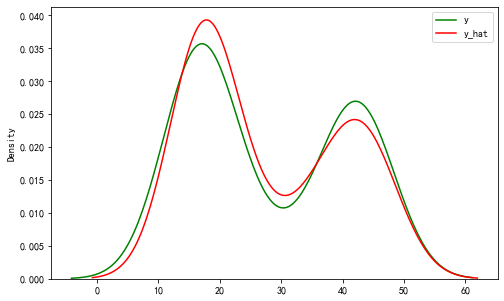

In [68]:
X=df[['累计收藏']] # 독립 변수 X
y=df[['付款']]    # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,            # 독립 변수
                                                   y,             # 종속 변수
                                                   test_size=0.3,  # 검증 30%
                                                   random_state=10 # 랜덤 추출 값
                                                   )

print('train data 개수 : ', len(X_train))
print('testdata 개수 : ', len(X_test))

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀 분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)

print(r_square)

# 회귀식의 기울기
print('기울기 : ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 :', lr.intercept_)

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(8, 5))
ax1 = sns.distplot(y, hist=False, color = 'green',label="y")

ax2 = sns.distplot(y_hat, hist=False, label="y_hat", color ='red', ax=ax1)

plt.legend()

plt.show()
plt.close()

### 累计收藏和付款的 ： 0.88334097*x + 10.28270136， R**2 = 0.9461885169907109


# 다중회귀분석으로 상관 관계 분석하기
### 利用机器学习多重回归分析的数据相关关系分析

훈련 데이터:  (34, 3)
검증 데이터:  (15, 3)
(R-제곱): 0.9451511668584344


y절편 [8.79748043]
기울기 :  [[ 0.86150472 -0.00608328  0.07895929]]




C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


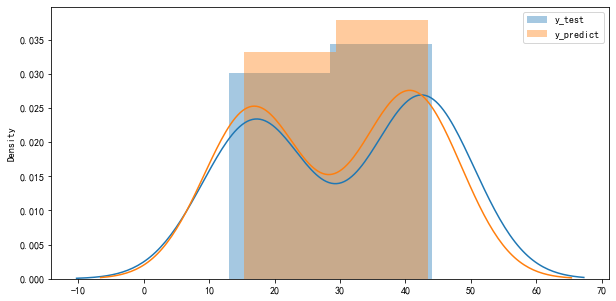

In [73]:
# 속성(변수)선택
X = df[['累计收藏','淘宝（浏览量）','淘宝（访客量）']] #독립변수 X1,X2,X3
y = df[['付款']]    # 종속 변수 Y

# train data와 test data로 구분(7:3비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)


# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('(R-제곱):',  r_square)
print('\n')

# 회귀식의 y절편 
print('y절편', lr.intercept_)

# 회귀식의 기울기
print('기울기 : ', lr.coef_)
print('\n')




# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, label="y_test")
ax2 = sns.distplot(y_hat, label="y_predict", ax=ax1)
plt.legend()
plt.show()
plt.close()
